<a href="https://colab.research.google.com/github/gwegayhu/dashboards-app/blob/master/Housing_Price_Dataset_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Install gdown if not already installed
!pip install gdown

# Import gdown
import gdown

# Replace 'your_file_id' with the actual file ID from the Google Drive link
file_id = '1Hcc5DM3uo42MTsZ2jA8RXClJvuXDibBz'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file to a local path
output_path = 'housing_price_dataset.csv'  # Choose a local file name
gdown.download(url, output_path, quiet=False)

# Now, you can load the data from the local file
data = pd.read_csv(output_path)

# ... (rest of your code remains the same)

Downloading...
From: https://drive.google.com/uc?id=1Hcc5DM3uo42MTsZ2jA8RXClJvuXDibBz
To: /content/housing_price_dataset.csv
100%|██████████| 1.94M/1.94M [00:00<00:00, 20.1MB/s]


In [41]:
# Step 1: Data Preparation
# Define Features (X) and Target Variable (y)
X = data[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt']]
y = data['Price']
# Encode Categorical Variables
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)

In [42]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Step 3: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
# Step 4: Make Predictions
y_pred = model.predict(X_test)

In [45]:
# Step 5: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 41884.393043164484
Mean Squared Error: 2764060109.4815617
R² Score: 0.5184525143047594


In [73]:
data.tail(10)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49990,2724,5,2,Suburb,1978,395026.724290
49991,1952,5,3,Suburb,1981,200237.485880
49992,1818,4,1,Rural,1983,163683.675434
49993,1215,2,3,Urban,2017,126052.390562
49994,2426,5,2,Urban,1950,331497.091307
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


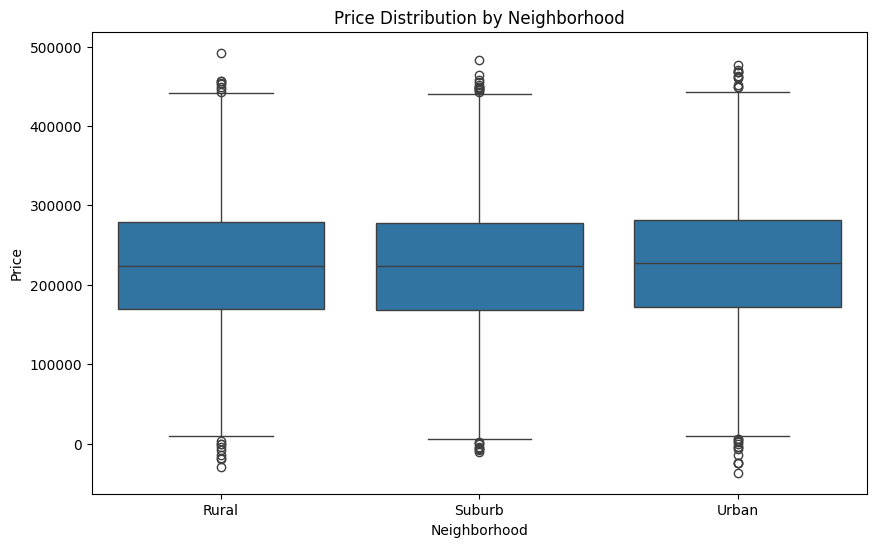

In [48]:
# @title Price Distribution by Neighborhood

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Neighborhood', y='Price', data=data)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
_ = plt.title('Price Distribution by Neighborhood')

In [50]:
model.feature_importances_

array([0.74240525, 0.02931762, 0.03334526, 0.15705921, 0.01910008,
       0.01877256])

In [58]:
model.feature_importances_  # Access feature importances from the RandomForestRegressor

array([0.74240525, 0.02931762, 0.03334526, 0.15705921, 0.01910008,
       0.01877256])

In [61]:
# Get the one-hot encoded column names for Neighborhood
neighborhood_cols = [col for col in X_train.columns if col.startswith('Neighborhood_')]
# Assume 'Neighborhood' value of 2 represents the second neighborhood in the original data
# Create a dictionary to represent the one-hot encoded values for this neighborhood
# **IMPORTANT

In [63]:
# Get the one-hot encoded column names for Neighborhood
neighborhood_cols = [col for col in X_train.columns if col.startswith('Neighborhood_')]

# Assume 'Neighborhood' value of 2 represents the second neighborhood in the original data
# Create a dictionary to represent the one-hot encoded values for this neighborhood
# **IMPORTANT:** Check if neighborhood_cols[1] is the correct index for neighborhood value 2.
# You might need to adjust this index based on the actual neighborhood mapping in your dataset.
neighborhood_values = {col: 1 if col == neighborhood_cols[1] else 0 for col in neighborhood_cols}

# Create the input data with one-hot encoded neighborhood values
input_data = [[2500, 3, 2, 2007]]
input_data[0].extend(neighborhood_values.values())  # Add neighborhood values to the input list

# Make prediction
y_pred = model.predict([input_data[0]])  # Convert to a 2D array by adding an extra brackets

print(y_pred)

[281371.98209508]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


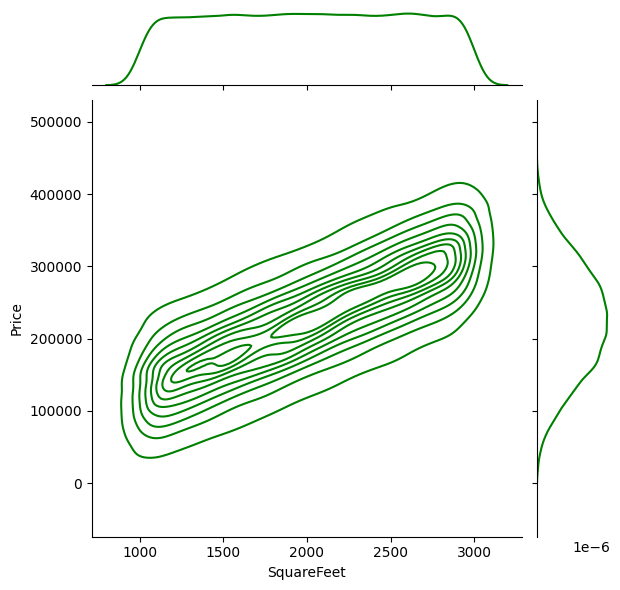

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot(x="SquareFeet", y="Price", data=data, kind = "kde", color = "g")

In [66]:
# Calculate correlations for numeric columns only
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

            SquareFeet  Bedrooms  Bathrooms  YearBuilt     Price
SquareFeet    1.000000 -0.002638  -0.003275   0.000482  0.750720
Bedrooms     -0.002638  1.000000   0.007405   0.003147  0.072624
Bathrooms    -0.003275  0.007405   1.000000   0.003748  0.028418
YearBuilt     0.000482  0.003147   0.003748   1.000000 -0.002288
Price         0.750720  0.072624   0.028418  -0.002288  1.000000


<Axes: >

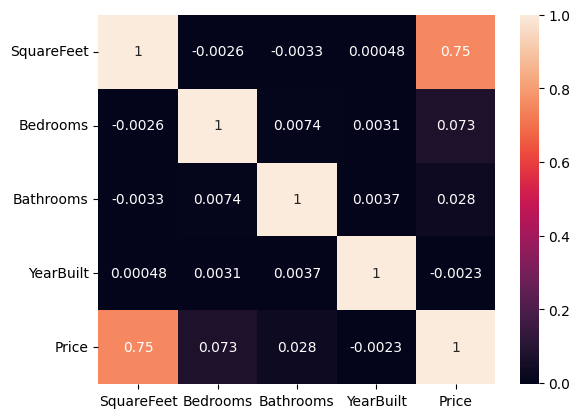

In [68]:
import seaborn as sns

# Calculate correlations for numeric columns only
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Create the heatmap using the correlation matrix of numeric data
sns.heatmap(correlation_matrix, annot=True)